## Load Base Stable Diffusion Model

In [3]:
from diffusers import StableDiffusionPipeline
from pruna.algorithms.smasher_config import AutoSmasherConfig, SmasherConfig
from pruna.smash import smash
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


## Smash it!

In [4]:
smasher_config = SmasherConfig()
smasher_config['compiler'] = 'diffusers'
smasher_config['max_batch_size'] = 1
smasher_config['image_height'] = 512
smasher_config['image_width'] = 512
smasher_config['version'] = '1.5'

In [5]:
smashed_model = smash(
        model=pipe,
        data_module="LAION256",
        api_key='your-api-key',
        model_config=None,
        smasher_config=smasher_config,
        device='cuda',
    )

Received a 500 error, retrying in 3 seconds...


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating artwork split:   0%|          | 0/452 [00:00<?, ? examples/s]

Generating person split:   0%|          | 0/501 [00:00<?, ? examples/s]

Generating object split:   0%|          | 0/114 [00:00<?, ? examples/s]

Compile...
[I] Create directory: .cache/engine
[I] Create directory: .cache/onnx
Exporting model: .cache/onnx/clip/model.onnx
Generating optimizing model: .cache/onnx/clip.opt/model.onnx
[W] 'colored' module is not installed, will not use colors when logging. To enable colors, please install the 'colored' module: python3 -m pip install colored
[E] ONNX-Runtime is not installed, so constant folding may be suboptimal or not work at all.
    Consider installing ONNX-Runtime: /nfs/students/rachwan/miniconda3/envs/pruna_pypi/bin/python -m pip install onnxruntime
[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install colored
[W] Inference failed. You may want to try enabling partitioning to see better results. Note: Error was:
No module named 'onnxruntime'
[W] colored module is not installed, will not use colors when logging. To enable colors, please install the colored module: python3 -m pip install 

[libprotobuf WARNING google/protobuf/io/coded_stream.cc:604] Reading dangerously large protocol message.  If the message turns out to be larger than 2147483647 bytes, parsing will be halted for security reasons.  To increase the limit (or to disable these warnings), see CodedInputStream::SetTotalBytesLimit() in google/protobuf/io/coded_stream.h.
[libprotobuf WARNING google/protobuf/io/coded_stream.cc:81] The total number of bytes read was 1720662620
[libprotobuf WARNING google/protobuf/io/coded_stream.cc:604] Reading dangerously large protocol message.  If the message turns out to be larger than 2147483647 bytes, parsing will be halted for security reasons.  To increase the limit (or to disable these warnings), see CodedInputStream::SetTotalBytesLimit() in google/protobuf/io/coded_stream.h.
[libprotobuf WARNING google/protobuf/io/coded_stream.cc:81] The total number of bytes read was 1720662620


Building TensorRT engine for .cache/onnx/vae.opt/model.onnx: .cache/engine/vae.plan
Loading TensorRT engine: .cache/engine/clip.plan
Loading TensorRT engine: .cache/engine/unet.plan
Loading TensorRT engine: .cache/engine/vae.plan
Success.
Error logging request, retrying in 3 seconds...


## Base Model Generation

  0%|          | 0/50 [00:00<?, ?it/s]

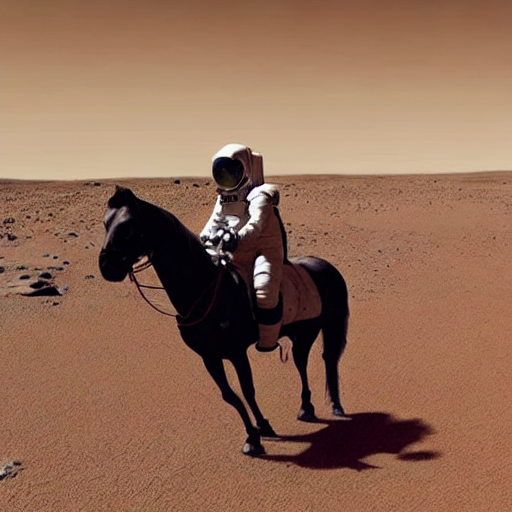

CPU times: user 2.23 s, sys: 24.2 ms, total: 2.25 s
Wall time: 2.37 s


In [6]:
%%time
image = pipe(prompt).images[0].show()

## Smashed Model Generation

CPU times: user 522 ms, sys: 399 ms, total: 920 ms
Wall time: 981 ms


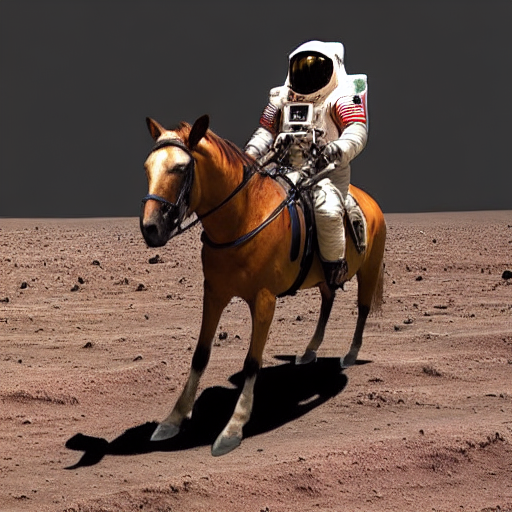

In [7]:
%%time
smashed_model(prompt, image_height=512, image_width=512)[0]